In [1]:
import tensorflow as tf
import os
import cv2
import random
import numpy as np
import time
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import TensorBoard, LearningRateScheduler, ModelCheckpoint

In [2]:
PATH = '/kaggle/input'
IMG_SIZE = 200
training_data = []

In [3]:
for dirname, _, filenames in os.walk(PATH):
    for filename in filenames:
        img_path = os.path.join(dirname, filename)
        img = cv2.imread(img_path, 0)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        training_data.append([img, img_path.split('_')[2]])
        
random.shuffle(training_data)

In [4]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    if ord(label)<60: y.append(ord(label)-ord('0'))
    else: y.append(ord(label)-ord('a')+10)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0
y = np.array(y)

In [5]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(rate=0.5))

model.add(Dense(128))
model.add(Dropout(rate=0.5))

model.add(Dense(36))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
NAME = "Hand-Gesture-Recognition-CNN"
tensorboard = TensorBoard(log_dir=NAME)

In [7]:
trainer = model.fit(X, y, epochs=10, validation_split=0.2,
          callbacks = [tensorboard])

Train on 2012 samples, validate on 503 samples
Epoch 1/10
2012/2012 [==============================] - 49s 24ms/sample - loss: 3.0111 - accuracy: 0.2147 - val_loss: 1.3274 - val_accuracy: 0.7316
Epoch 2/10
2012/2012 [==============================] - 36s 18ms/sample - loss: 1.4077 - accuracy: 0.5850 - val_loss: 0.4364 - val_accuracy: 0.8569
Epoch 3/10
2012/2012 [==============================] - 36s 18ms/sample - loss: 0.7650 - accuracy: 0.7719 - val_loss: 0.3889 - val_accuracy: 0.8767
Epoch 4/10
2012/2012 [==============================] - 36s 18ms/sample - loss: 0.5223 - accuracy: 0.8474 - val_loss: 0.2593 - val_accuracy: 0.9085
Epoch 5/10
2012/2012 [==============================] - 36s 18ms/sample - loss: 0.3742 - accuracy: 0.8748 - val_loss: 0.2521 - val_accuracy: 0.9185
Epoch 6/10
2012/2012 [==============================] - 36s 18ms/sample - loss: 0.3160 - accuracy: 0.8986 - val_loss: 0.1901 - val_accuracy: 0.9384
Epoch 7/10
2012/2012 [==============================] - 36s 18ms/

In [8]:
epoch = [i+1 for i in range(len(trainer.history['accuracy']))]

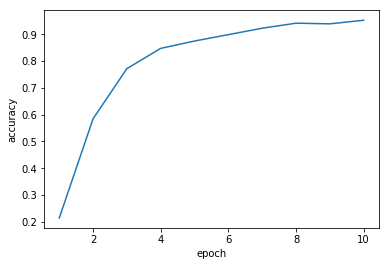

In [9]:
plt.plot(epoch, trainer.history['accuracy'],)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

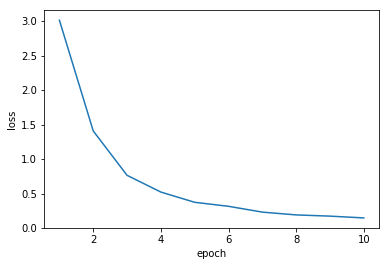

In [10]:
plt.plot(epoch,trainer.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

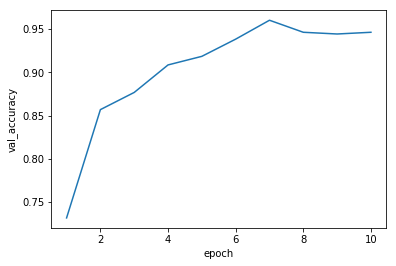

In [11]:
plt.plot(epoch, trainer.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('val_accuracy')
plt.show()

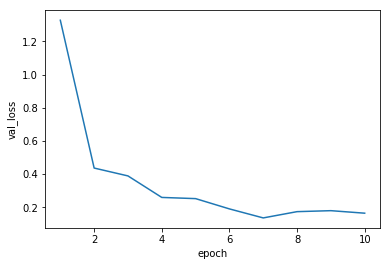

In [12]:
plt.plot(epoch, trainer.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()